In [1]:
import os
import numpy as np

import torch
torch.manual_seed(29)
from torch import nn
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.nn.parallel
cudnn.benchmark = True
from torch.utils.data import DataLoader

from torchstat import stat
from utils import  models
from utils.trainer import Trainer
from utils.data import dataset_1
from utils.trainer_utils import parfilter

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
img_file = "/media/narsi/fast_drive/super_resolution/fliker1k/val/0_1_2.png"

In [5]:
I = Image.open(img_file).resize((64, 64), Image.BICUBIC)

In [7]:
model = models.MODEL_TEST1()

check_point_file = "/media/narsi/LargeData/SP_2020/compressACT/weights/MODEL_TEST1_EXP01/model_best.pth.tar"
checkpoint = torch.load(check_point_file)
best_loss = checkpoint['Loss']
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [11]:
I1 = np.float32(I)/255.0
I1 = np.transpose(I1, [2, 0, 1])
It = torch.from_numpy(np.expand_dims(I1, 0))

In [12]:
X = model(It)

In [14]:
-10 * torch.log10(nn.functional.mse_loss(It, X))

tensor(17.8208, grad_fn=<MulBackward0>)

In [16]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


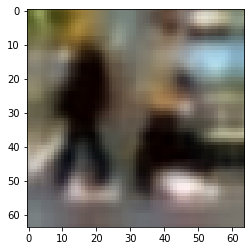

In [18]:
plt.imshow(X.squeeze().data.cpu().numpy().transpose([1, 2, 0]))

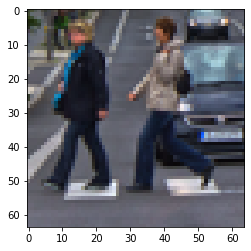

In [20]:
plt.imshow(I)